In [132]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [97]:
df = pd.read_csv("sales_data_sample.csv", encoding="latin1")

In [99]:
print(df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [101]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [103]:
# Drop unnecessary columns
to_drop = ['ADDRESSLINE1', 'ADDRESSLINE2', 'STATE', 'POSTALCODE', 'PHONE']
df = df.drop(to_drop, axis=1)

In [109]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
CITY                 object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [111]:
#2. select numeric columns for clustering
numeric_cols = df.select_dtypes(include=['int64' , 'float64']).columns
X= df[numeric_cols]

In [113]:
#3. standardise the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

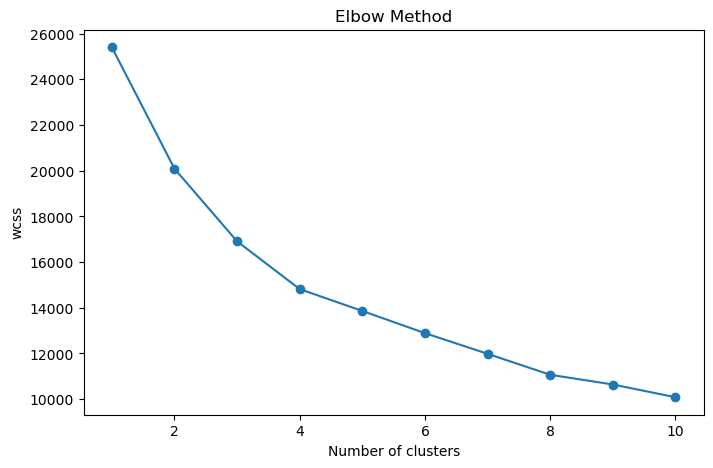

In [115]:
#.4 Elbow method to determine optimal k for k-means
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [117]:
wcss

[25407.000000000022,
 20090.88701217339,
 16909.35954783242,
 14818.012273279457,
 13861.326299859735,
 12890.484433639991,
 11986.184349107181,
 11068.259543201313,
 10642.06873707474,
 10085.260683115197]

In [121]:
#5. k-means clustering
k=4 #chose based of elbow plot

kmeans= KMeans(n_clusters=k, random_state=42)
df['KMeans_Clusters'] = kmeans.fit_predict(X_scaled)
print("\nK-means Clustering Result : ")
df.head()


K-means Clustering Result : 


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,KMeans_Clusters
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,95,S10_1678,Land of Toys Inc.,NYC,USA,NaN,Yu,Kwai,Small,2
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,95,S10_1678,Reims Collectables,Reims,France,EMEA,Henriot,Paul,Small,2
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,95,S10_1678,Lyon Souveniers,Paris,France,EMEA,Da Cunha,Daniel,Medium,2
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,NaN,Young,Julie,Medium,1
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,USA,NaN,Brown,Julie,Medium,1


In [123]:
cluster_summary = df.groupby('KMeans_Clusters')[numeric_cols].mean()
print(cluster_summary)

                  ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  \
KMeans_Clusters                                                              
0                10392.297071        36.884937  83.445251         5.972803   
1                10251.917722        35.882911  98.114736         6.526371   
2                10181.122172        34.880845  85.962443         6.419306   
3                10250.628065        33.096730  63.045463         6.752044   

                       SALES    QTR_ID  MONTH_ID      YEAR_ID        MSRP  
KMeans_Clusters                                                            
0                3747.880146  1.368201  3.002092  2005.000000  100.167364  
1                4667.745464  3.630802  9.835443  2003.566456  127.525316  
2                3468.713846  1.485671  3.368024  2003.565611  100.726998  
3                2065.888501  3.529973  9.577657  2003.589918   66.435967  


- Cluster 1 represents high-value customers who purchase high-priced products and generate the highest sales. 
- Cluster 0 represents medium-value customers with moderately priced products and good sales volume.
- Cluster 2 represents regular customers with average order quantities and stable sales.
- Cluster 3 represents low-value customers, purchasing low-priced items with low sales contribution.

### **Cluster Interpretation**

| **Cluster** | **Description** | **Key Characteristics** | **Business Insight** |
|------------|-----------------|-------------------------|----------------------|
| **Cluster 1** | **High-Value Customers / Premium Orders** | - Highest Sales (4667) and PriceEach (98) <br> - Higher MSRP → premium/expensive products | Best group for **up-selling**, premium offers, and loyalty programs. |
| **Cluster 0** | **Steady, Mid-Value Orders** | - Medium Sales (~3748) and mid PriceEach <br> - Mostly from year 2005 & around March | Represents **stable, consistent buyers** contributing steady revenue. |
| **Cluster 2** | **Standard / Routine Sales** | - Slightly lower Sales (~3469) <br> - Typical everyday purchases | Represents **average customers** that maintain **baseline revenue**. |
| **Cluster 3** | **Low-Value / Discount Orders** | - Lowest Sales (~2066) and lower PriceEach (~63) <br> - Lower MSRP → cheaper/discount products | Contains **price-sensitive customers**. Good target for **offers, deals, promotions**. |

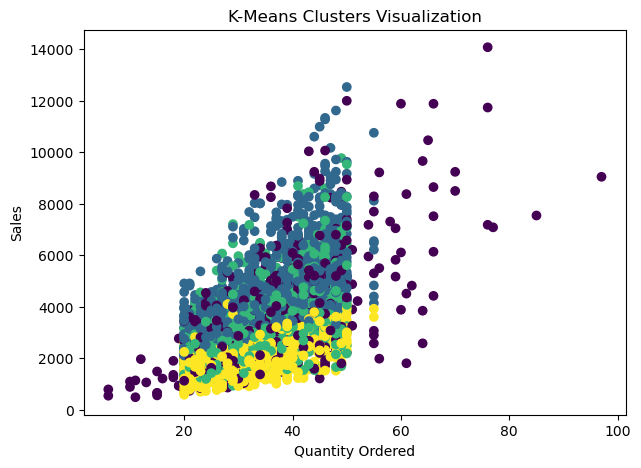

In [126]:
plt.figure(figsize=(7,5))
plt.scatter(df['QUANTITYORDERED'], df['SALES'], c=df['KMeans_Clusters'])
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.title('K-Means Clusters Visualization')
plt.show()

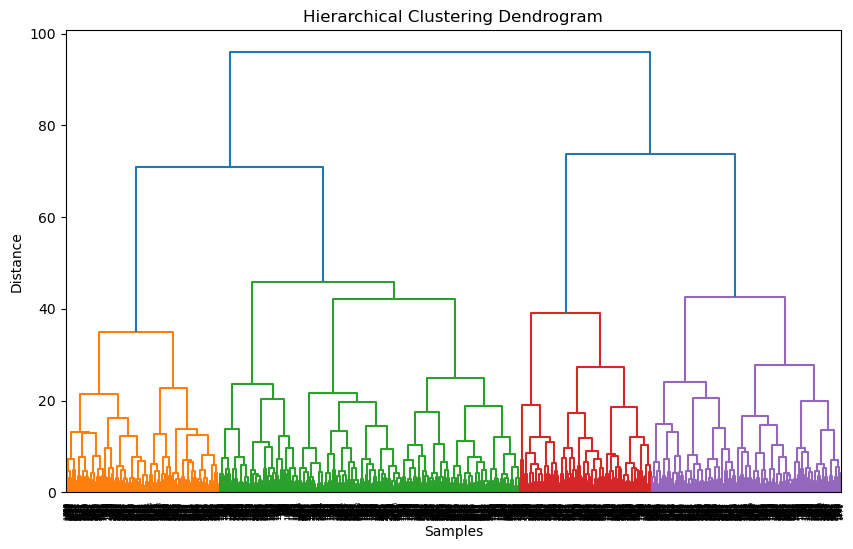

   KMeans_Clusters  Hierarchical_Clusters
0                2                      4
1                2                      4
2                2                      2
3                1                      1
4                1                      1


In [128]:
# 6. Hierarchical Clustering
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Assign clusters (cut dendrogram at k clusters)
df['Hierarchical_Clusters'] = fcluster(linked, 4, criterion='maxclust')
print(df[['KMeans_Clusters', 'Hierarchical_Clusters']].head())

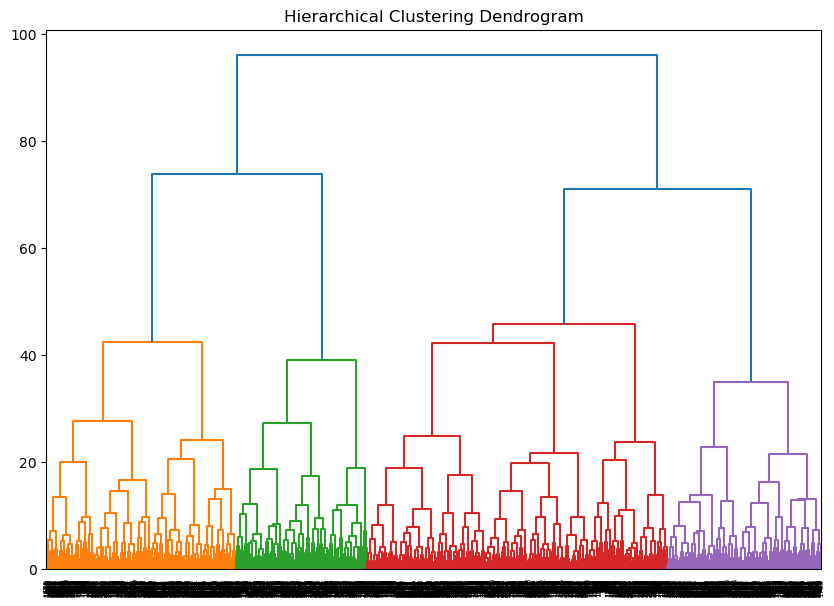


Hierarchical Clustering result:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

               CUSTOMERNAME           CITY COUNTRY TERRITORY CONTACTLASTNAME  \
0         Land of Toys Inc.            NYC     USA       NaN              Y

In [129]:
# 6. Hierarchical Clustering
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Assign clusters (cut dendrogram at k clusters)
df['Hier_Cluster'] = fcluster(linked, k, criterion='maxclust')
print("\nHierarchical Clustering result:")
print(df.head())